In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from arch import arch_model

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
Train_df = pd.read_csv('SET_Train.csv')
Train_df['Date'] = pd.to_datetime(Train_df['Date'])
Train_df.head()

,Date,Close,Volume,MA_diff_3,MA_diff_5,MA_diff_10,MA_diff_14,MA_diff_20,EMA_diff,MOM1,...,CCI_3,CCI_5,CCI_10,CCI_14,CCI_20,STD_3,STD_5,STD_10,STD_14,STD_20
0,2015-01-05,1483.25,7129188.0,-9.053333,-8.362,0.305,-3.111429,-5.5285,-4.150252,-0.009628,...,-76.939569,-102.320118,-115.435704,-62.917422,-68.977585,8.488618,10.188931,16.525210,21.836628,40.461447
1,2015-01-06,1477.58,31337740.0,-6.880000,-5.462,-3.921,-2.669286,-5.8210,-4.302226,-0.003823,...,-55.267416,-80.779163,-103.310026,-69.503711,-72.515096,10.357714,13.077623,19.593445,22.645581,38.348790
2,2015-01-07,1500.75,12400610.0,1.026667,-1.932,-1.360,1.590000,-4.6915,-1.555004,0.015681,...,74.829274,59.472398,-19.869225,-6.237083,-27.028768,12.077857,10.375675,19.571298,21.690538,34.164826
3,2015-01-08,1521.62,18000260.0,12.790000,4.680,-1.521,4.277143,-3.8070,0.687497,0.013906,...,65.476328,98.624397,63.317813,52.006486,25.667072,22.030008,17.200606,17.433739,18.668910,28.117731
4,2015-01-09,1529.42,32278560.0,17.280000,6.350,-0.175,3.515714,-2.3065,1.398747,0.005126,...,54.673983,78.538898,95.371867,70.439460,57.815804,14.823213,22.830294,17.149006,17.838344,24.136416


In [3]:
# Generate 1-day, 3-day, 5-day, 10-day, 14-day and 20-day log return
Ret_1 = (100*(np.log(Train_df['Close']) - np.log(Train_df['Close'].shift(1))))[1:]
Ret_3 = (100*(np.log(Train_df['Close']) - np.log(Train_df['Close'].shift(3))))[3:]
Ret_5 = (100*(np.log(Train_df['Close']) - np.log(Train_df['Close'].shift(5))))[5:]
Ret_10 = (100*(np.log(Train_df['Close']) - np.log(Train_df['Close'].shift(10))))[10:]
Ret_14 = (100*(np.log(Train_df['Close']) - np.log(Train_df['Close'].shift(14))))[14:]
Ret_20 = (100*(np.log(Train_df['Close']) - np.log(Train_df['Close'].shift(20))))[20:]

## Line plots + Descriptive Stats on Log Returns

Text(0.5, 1.0, 'One-day Return from 2015 to 2019')

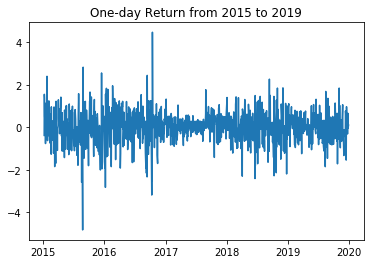

In [13]:
fig, ax = plt.subplots()
ax.plot(Train_df['Date'], Ret_1)
plt.title('One-day Return from 2015 to 2019')

In [4]:
Ret_1.describe()

count    1218.000000
mean        0.005180
std         0.729614
min        -4.842190
25%        -0.383602
50%         0.026627
75%         0.409438
max         4.483821
Name: Close, dtype: float64

In [35]:
print(sm.stats.stattools.robust_skewness(Ret_1)[0])
print(sm.stats.stattools.robust_kurtosis(Ret_1)[0])
print(stats.jarque_bera(Ret_1))

-0.2828728335118043
3.788501828641155
(744.6453239676979, 0.0)


Text(0.5, 1.0, 'Three-day Return from 2015 to 2019')

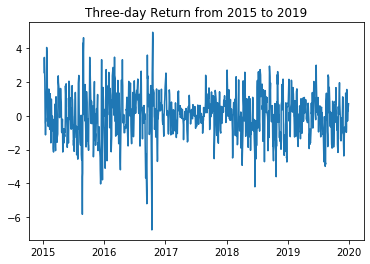

In [14]:
fig, ax = plt.subplots()
ax.plot(Train_df['Date'], Ret_3)
plt.title('Three-day Return from 2015 to 2019')

In [5]:
Ret_3.describe()

count    1216.000000
mean        0.014788
std         1.297280
min        -6.747746
25%        -0.757638
50%         0.062463
75%         0.800668
max         4.936637
Name: Close, dtype: float64

In [36]:
print(sm.stats.stattools.robust_skewness(Ret_3)[0])
print(sm.stats.stattools.robust_kurtosis(Ret_3)[0])
print(stats.jarque_bera(Ret_3))

-0.2740193422795587
1.5105463074608894
(130.82622503568876, 0.0)


Text(0.5, 1.0, 'Five-day Return from 2015 to 2019')

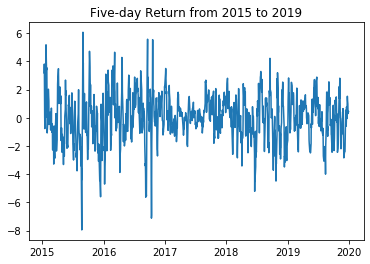

In [15]:
fig, ax = plt.subplots()
ax.plot(Train_df['Date'], Ret_5)
plt.title('Five-day Return from 2015 to 2019')

In [6]:
Ret_5.describe()

count    1214.000000
mean        0.019663
std         1.661979
min        -7.951637
25%        -0.915223
50%         0.102905
75%         1.041887
max         6.064904
Name: Close, dtype: float64

In [37]:
print(sm.stats.stattools.robust_skewness(Ret_5)[0])
print(sm.stats.stattools.robust_kurtosis(Ret_5)[0])
print(stats.jarque_bera(Ret_5))

-0.3030362437108946
1.2600462937457406
(98.89246642432926, 0.0)


Text(0.5, 1.0, 'Ten-day Return from 2015 to 2019')

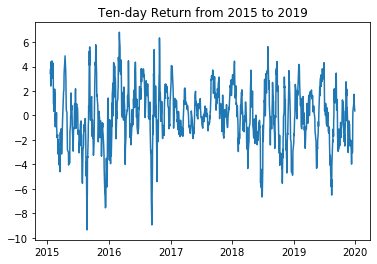

In [16]:
fig, ax = plt.subplots()
ax.plot(Train_df['Date'], Ret_10)
plt.title('Ten-day Return from 2015 to 2019')

In [7]:
Ret_10.describe()

count    1209.000000
mean        0.029276
std         2.314412
min        -9.364862
25%        -1.358197
50%         0.043316
75%         1.543373
max         6.814241
Name: Close, dtype: float64

In [38]:
print(sm.stats.stattools.robust_skewness(Ret_10)[0])
print(sm.stats.stattools.robust_kurtosis(Ret_10)[0])
print(stats.jarque_bera(Ret_10))

-0.31640265700919085
0.5324933319747163
(34.45608259513967, 3.2957687468027075e-08)


Text(0.5, 1.0, 'Fourteen-day Return from 2015 to 2019')

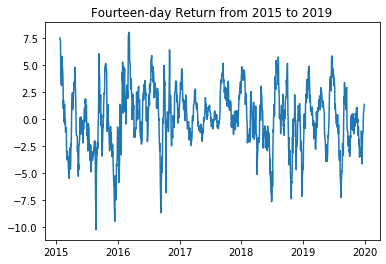

In [17]:
fig, ax = plt.subplots()
ax.plot(Train_df['Date'], Ret_14)
plt.title('Fourteen-day Return from 2015 to 2019')

In [8]:
Ret_14.describe()

count    1205.000000
mean        0.033354
std         2.737789
min       -10.287946
25%        -1.572548
50%         0.020022
75%         1.824313
max         8.003077
Name: Close, dtype: float64

In [39]:
print(sm.stats.stattools.robust_skewness(Ret_14)[0])
print(sm.stats.stattools.robust_kurtosis(Ret_14)[0])
print(stats.jarque_bera(Ret_14))

-0.26360082789928746
0.3339792484467239
(19.555328656046143, 5.6704083636116565e-05)


Text(0.5, 1.0, 'Twenty-day Return from 2015 to 2019')

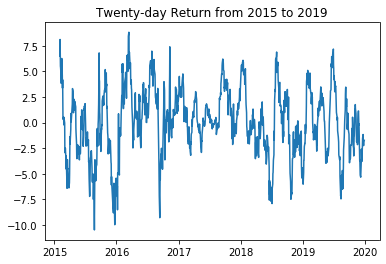

In [18]:
fig, ax = plt.subplots()
ax.plot(Train_df['Date'], Ret_20)
plt.title('Twenty-day Return from 2015 to 2019')

In [9]:
Ret_20.describe()

count    1199.000000
mean        0.028916
std         3.262998
min       -10.469468
25%        -2.038049
50%         0.082229
75%         2.283809
max         8.825686
Name: Close, dtype: float64

In [40]:
print(sm.stats.stattools.robust_skewness(Ret_20)[0])
print(sm.stats.stattools.robust_kurtosis(Ret_20)[0])
print(stats.jarque_bera(Ret_20))

-0.1946075246554028
-0.1345037147169199
(8.471914377304731, 0.014465956918908396)


## Preliminary Tests for Volatility Model: ADF + ARCH-LM

In [27]:
# ADF Test to test for log-return stationarity
ADF_1 = sm.tsa.stattools.adfuller(Ret_1)
print("ADF for One-day Return: Test Statistics {}, P-value {}, Lags used {}, Number of Obs {}".format(ADF_1[0], ADF_1[1], ADF_1[2], ADF_1[3]))
ADF_3 = sm.tsa.stattools.adfuller(Ret_3)
print("ADF for Three-day Return: Test Statistics {}, P-value {}, Lags used {}, Number of Obs {}".format(ADF_3[0], ADF_3[1], ADF_3[2], ADF_3[3]))
ADF_5 = sm.tsa.stattools.adfuller(Ret_5)
print("ADF for Five-day Return: Test Statistics {}, P-value {}, Lags used {}, Number of Obs {}".format(ADF_5[0], ADF_5[1], ADF_5[2], ADF_5[3]))
ADF_10 = sm.tsa.stattools.adfuller(Ret_10)
print("ADF for Ten-day Return: Test Statistics {}, P-value {}, Lags used {}, Number of Obs {}".format(ADF_10[0], ADF_10[1], ADF_10[2], ADF_10[3]))
ADF_14 = sm.tsa.stattools.adfuller(Ret_14)
print("ADF for Fourteen-day Return: Test Statistics {}, P-value {}, Lags used {}, Number of Obs {}".format(ADF_14[0], ADF_14[1], ADF_14[2], ADF_14[3]))
ADF_20 = sm.tsa.stattools.adfuller(Ret_20)
print("ADF for Twenty-day Return: Test Statistics {}, P-value {}, Lags used {}, Number of Obs {}".format(ADF_20[0], ADF_20[1], ADF_20[2], ADF_20[3]))

ADF for One-day Return: Test Statistics -33.58788179325588, P-value 0.0, Lags used 0, Number of Obs 1217
ADF for Three-day Return: Test Statistics -6.8829436693311665, P-value 1.4181045076789566e-09, Lags used 21, Number of Obs 1194
ADF for Five-day Return: Test Statistics -6.641614599423018, P-value 5.39213065276759e-09, Lags used 23, Number of Obs 1190
ADF for Ten-day Return: Test Statistics -5.704185853571973, P-value 7.554597544309081e-07, Lags used 20, Number of Obs 1188
ADF for Fourteen-day Return: Test Statistics -5.75388281306997, P-value 5.880631592301118e-07, Lags used 16, Number of Obs 1188
ADF for Twenty-day Return: Test Statistics -5.140735509962233, P-value 1.1602411738669215e-05, Lags used 22, Number of Obs 1176


In [28]:
# Test on ARCH effect using LM-ARCH
LM_1 = sm.stats.diagnostic.het_arch(Ret_1)
print("LM ARCH for One-day Return: LM Test Statistics {}, P-value {}, F Test Statistics {}, P-value {}".format(LM_1[0], LM_1[1], LM_1[2], LM_1[3]))
LM_3 = sm.stats.diagnostic.het_arch(Ret_3)
print("LM ARCH for Three-day Return: LM Test Statistics {}, P-value {}, F Test Statistics {}, P-value {}".format(LM_3[0], LM_3[1], LM_3[2], LM_3[3]))
LM_5 = sm.stats.diagnostic.het_arch(Ret_5)
print("LM ARCH for Five-day Return: LM Test Statistics {}, P-value {}, F Test Statistics {}, P-value {}".format(LM_5[0], LM_5[1], LM_5[2], LM_5[3]))
LM_10 = sm.stats.diagnostic.het_arch(Ret_10)
print("LM ARCH for Ten-day Return: LM Test Statistics {}, P-value {}, F Test Statistics {}, P-value {}".format(LM_10[0], LM_10[1], LM_10[2], LM_10[3]))
LM_14 = sm.stats.diagnostic.het_arch(Ret_14)
print("LM ARCH for Fourteen-day Return: LM Test Statistics {}, P-value {}, F Test Statistics {}, P-value {}".format(LM_14[0], LM_14[1], LM_14[2], LM_14[3]))
LM_20 = sm.stats.diagnostic.het_arch(Ret_20)
print("LM ARCH for Twenty-day Return: LM Test Statistics {}, P-value {}, F Test Statistics {}, P-value {}".format(LM_20[0], LM_20[1], LM_20[2], LM_20[3]))

LM ARCH for One-day Return: LM Test Statistics 116.52670633126264, P-value 1.7461197730459217e-14, F Test Statistics 5.501044208188248, P-value 2.5188361628983862e-15
LM ARCH for Three-day Return: LM Test Statistics 370.4839944397314, P-value 2.0481218081096806e-64, F Test Statistics 22.893477561651597, P-value 2.04530395640279e-78
LM ARCH for Five-day Return: LM Test Statistics 435.8753893461746, P-value 7.065865604539716e-78, F Test Statistics 29.287799551650284, P-value 9.372027270732415e-99
LM ARCH for Ten-day Return: LM Test Statistics 734.7157353589174, P-value 2.132926413659117e-140, F Test Statistics 82.25218476507382, P-value 1.0156075893791691e-224
LM ARCH for Fourteen-day Return: LM Test Statistics 809.7046430648747, P-value 3.071443885238061e-156, F Test Statistics 109.50141545261175, P-value 5.683123744722254e-271
LM ARCH for Twenty-day Return: LM Test Statistics 876.9956244612866, P-value 1.7316218097443617e-170, F Test Statistics 146.90768866845775, P-value 1.14e-322


C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:625: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  FutureWarning)


## GARCH Model

In [52]:
GARCH_1 = arch_model(Ret_1, p=1, q=1).fit(update_freq=5, disp='off')
GARCH_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1255.27
Distribution:                  Normal   AIC:                           2518.55
Method:            Maximum Likelihood   BIC:                           2538.97
                                        No. Observations:                 1218
Date:                Mon, Feb 15 2021   Df Residuals:                     1217
Time:                        13:50:23   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0232  1.669e-02      1.390      0.165 [-9.509e-03,5.590e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.1310e-03  4.405e-03      1.165      0.244 [-3.503e-03,1.376e-02]
alpha[1]       0.0801  2.590e-02      3.091  1.994e-03    [2.930e-02,  0.131]
beta[1]        0.9140  2.605e-02     35.088 1.023e-269      [  0.863,  0.965]
=============================================================================

Covariance estimator: robust
"""

In [54]:
GARCH_5 = arch_model(Ret_5, p=1, q=1).fit(update_freq=5, disp='off')
GARCH_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2098.00
Distribution:                  Normal   AIC:                           4204.00
Method:            Maximum Likelihood   BIC:                           4224.40
                                        No. Observations:                 1214
Date:                Mon, Feb 15 2021   Df Residuals:                     1213
Time:                        13:50:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1321  6.026e-02      2.192  2.835e-02 [1.400e-02,  0.250]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3955      0.145      2.724  6.443e-03    [  0.111,  0.680]
alpha[1]       0.6853  8.901e-02      7.699  1.372e-14    [  0.511,  0.860]
beta[1]        0.2380      0.133      1.796  7.257e-02 [-2.179e-02,  0.498]
===========================================================================

Covariance estimator: robust
"""

In [55]:
GARCH_10 = arch_model(Ret_10, p=1, q=1).fit(update_freq=5, disp='off')
GARCH_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2399.63
Distribution:                  Normal   AIC:                           4807.26
Method:            Maximum Likelihood   BIC:                           4827.65
                                        No. Observations:                 1209
Date:                Mon, Feb 15 2021   Df Residuals:                     1208
Time:                        13:51:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1763      0.145      1.219      0.223 [ -0.107,  0.460]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.8489      0.129      6.588  4.449e-11      [  0.596,  1.101]
alpha[1]       0.8280  4.294e-02     19.283  7.465e-83      [  0.744,  0.912]
beta[1]        0.0188  3.091e-02      0.607      0.544 [-4.180e-02,7.935e-02]
=============================================================================

Covariance estimator: robust
"""

In [56]:
GARCH_14 = arch_model(Ret_14, p=1, q=1).fit(update_freq=5, disp='off')
GARCH_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2530.46
Distribution:                  Normal   AIC:                           5068.91
Method:            Maximum Likelihood   BIC:                           5089.29
                                        No. Observations:                 1205
Date:                Mon, Feb 15 2021   Df Residuals:                     1204
Time:                        13:51:15   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0331      0.136      0.244      0.808 [ -0.233,  0.300]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.8165      0.106      7.682  1.568e-14      [  0.608,  1.025]
alpha[1]       0.8804  3.606e-02     24.418 1.096e-131      [  0.810,  0.951]
beta[1]        0.0205  2.564e-02      0.800      0.424 [-2.974e-02,7.078e-02]
=============================================================================

Covariance estimator: robust
"""

In [57]:
GARCH_20 = arch_model(Ret_20, p=1, q=1).fit(update_freq=5, disp='off')
GARCH_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2701.21
Distribution:                  Normal   AIC:                           5410.43
Method:            Maximum Likelihood   BIC:                           5430.79
                                        No. Observations:                 1199
Date:                Mon, Feb 15 2021   Df Residuals:                     1198
Time:                        13:51:24   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0425      0.208      0.204      0.838 [ -0.366,  0.451]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7207      0.147      4.889  1.015e-06    [  0.432,  1.010]
alpha[1]       0.8718  5.198e-02     16.772  3.944e-63    [  0.770,  0.974]
beta[1]        0.0802  5.784e-02      1.387      0.165 [-3.312e-02,  0.194]
===========================================================================

Covariance estimator: robust
"""

In [53]:
GARCH_3 = arch_model(Ret_3, p=1, q=1).fit(update_freq=5, disp='off')
GARCH_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1876.43
Distribution:                  Normal   AIC:                           3760.86
Method:            Maximum Likelihood   BIC:                           3781.28
                                        No. Observations:                 1216
Date:                Mon, Feb 15 2021   Df Residuals:                     1215
Time:                        13:50:41   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1074  4.547e-02      2.361  1.822e-02 [1.824e-02,  0.196]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3720      0.101      3.691  2.236e-04   [  0.174,  0.570]
alpha[1]       0.5461  6.485e-02      8.422  3.695e-17   [  0.419,  0.673]
beta[1]        0.2668      0.107      2.492  1.269e-02 [5.700e-02,  0.477]
==========================================================================

Covariance estimator: robust
"""

## GJR-GARCH Model

In [46]:
GJR_GARCH_1 = arch_model(Ret_1, p=1, o=1, q=1).fit(update_freq=5, disp='off')
GJR_GARCH_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1235.96
Distribution:                  Normal   AIC:                           2481.93
Method:            Maximum Likelihood   BIC:                           2507.45
                                        No. Observations:                 1218
Date:                Mon, Feb 15 2021   Df Residuals:                     1217
Time:                        13:47:47   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.8249e-03  1.702e-02      0.283      0.777 [-2.854e-02,3.819e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.9726e-03  4.863e-03      2.051  4.029e-02  [4.418e-04,1.950e-02]
alpha[1]   1.8778e-03  1.615e-02      0.116      0.907 [-2.978e-02,3.354e-02]
gamma[1]       0.1167  3.397e-02      3.434  5.945e-04    [5.008e-02,  0.183]
beta[1]        0.9179  1.938e-02     47.357      0.000      [  0.880,  0.956]
=============================================================================

Covariance estimator: robust
"""

In [47]:
GJR_GARCH_3 = arch_model(Ret_3, p=1, o=1, q=1).fit(update_freq=5, disp='off')
GJR_GARCH_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1872.16
Distribution:                  Normal   AIC:                           3754.31
Method:            Maximum Likelihood   BIC:                           3779.83
                                        No. Observations:                 1216
Date:                Mon, Feb 15 2021   Df Residuals:                     1215
Time:                        13:47:55   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1112  4.584e-02      2.425  1.529e-02 [2.133e-02,  0.201]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3645  8.650e-02      4.213  2.515e-05   [  0.195,  0.534]
alpha[1]       0.4069  7.362e-02      5.528  3.244e-08   [  0.263,  0.551]
gamma[1]       0.2569  8.338e-02      3.082  2.059e-03 [9.351e-02,  0.420]
beta[1]        0.2746  9.854e-02      2.786  5.333e-03 [8.142e-02,  0.468]
==========================================================================

Covariance estimator: robust
"""

In [48]:
GJR_GARCH_5 = arch_model(Ret_5, p=1, o=1, q=1).fit(update_freq=5, disp='off')
GJR_GARCH_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2096.67
Distribution:                  Normal   AIC:                           4203.34
Method:            Maximum Likelihood   BIC:                           4228.85
                                        No. Observations:                 1214
Date:                Mon, Feb 15 2021   Df Residuals:                     1213
Time:                        13:48:14   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1278  6.129e-02      2.086  3.701e-02 [7.705e-03,  0.248]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3859      0.149      2.583  9.785e-03  [9.311e-02,  0.679]
alpha[1]       0.5960      0.123      4.829  1.374e-06    [  0.354,  0.838]
gamma[1]       0.1476  8.532e-02      1.730  8.363e-02 [-1.962e-02,  0.315]
beta[1]        0.2509      0.142      1.771  7.652e-02 [-2.673e-02,  0.529]
===========================================================================

Covariance estimator: robust
"""

In [49]:
GJR_GARCH_10 = arch_model(Ret_10, p=1, o=1, q=1).fit(update_freq=5, disp='off')
GJR_GARCH_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2399.36
Distribution:                  Normal   AIC:                           4808.72
Method:            Maximum Likelihood   BIC:                           4834.21
                                        No. Observations:                 1209
Date:                Mon, Feb 15 2021   Df Residuals:                     1208
Time:                        13:48:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1831      0.145      1.263      0.207 [ -0.101,  0.467]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.8441      0.130      6.516  7.235e-11      [  0.590,  1.098]
alpha[1]       0.7896  5.099e-02     15.487  4.261e-54      [  0.690,  0.890]
gamma[1]       0.0743  7.125e-02      1.043      0.297   [-6.535e-02,  0.214]
beta[1]        0.0199  3.087e-02      0.646      0.518 [-4.057e-02,8.045e-02]
=============================================================================

Covariance estimator: robust
"""

In [50]:
GJR_GARCH_14 = arch_model(Ret_14, p=1, o=1, q=1).fit(update_freq=5, disp='off')
GJR_GARCH_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2530.41
Distribution:                  Normal   AIC:                           5070.81
Method:            Maximum Likelihood   BIC:                           5096.28
                                        No. Observations:                 1205
Date:                Mon, Feb 15 2021   Df Residuals:                     1204
Time:                        13:49:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0342      0.137      0.250      0.803 [ -0.234,  0.302]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.8168      0.106      7.671  1.708e-14      [  0.608,  1.026]
alpha[1]       0.8651  4.318e-02     20.035  2.735e-89      [  0.780,  0.950]
gamma[1]       0.0320  6.102e-02      0.524      0.600   [-8.764e-02,  0.152]
beta[1]        0.0203  2.563e-02      0.790      0.429 [-2.997e-02,7.048e-02]
=============================================================================

Covariance estimator: robust
"""

In [51]:
GJR_GARCH_20 = arch_model(Ret_20, p=1, o=1, q=1).fit(update_freq=5, disp='off')
GJR_GARCH_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2701.21
Distribution:                  Normal   AIC:                           5412.42
Method:            Maximum Likelihood   BIC:                           5437.87
                                        No. Observations:                 1199
Date:                Mon, Feb 15 2021   Df Residuals:                     1198
Time:                        13:49:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0422      0.209      0.202      0.840 [ -0.368,  0.452]
                              Volatility Model                              
============================================================================
                  coef    std err          t      P>|t|     95.0% Conf. Int.
----------------------------------------------------------------------------
omega           0.7212      0.148      4.870  1.115e-06    [  0.431,  1.011]
alpha[1]        0.8763  6.207e-02     14.118  2.949e-45    [  0.755,  0.998]
gamma[1]   -9.1018e-03  5.581e-02     -0.163      0.870    [ -0.118,  0.100]
beta[1]         0.0801  5.804e-02      1.380      0.168 [-3.368e-02,  0.194]
============================================================================

Covariance estimator: robust
"""